In [1]:
#All imports
import pandas as pd
import seaborn as sns

In [2]:
#Reading Data
df = pd.read_csv('search_cohort_raw.csv')

In [3]:
df.head()

,user_id,date
0,002b74eac2cc17ed73924292af0c23f7,2020-07-23
1,002b74eac2cc17ed73924292af0c23f7,2020-07-24
2,008281f5fc74d8e48bc5943da22cb40c,2020-07-27
3,008281f5fc74d8e48bc5943da22cb40c,2020-07-28
4,009c33ce2d02aa8acaafc205eaf50a66,2020-07-22


In [4]:
#users with their first date of using app
df2 = df.groupby('user_id').min().reset_index(level = 0).sort_values(by = ['date']).rename(columns = {'date' : 'first_date'})

In [5]:
df2.head()

,user_id,first_date
5602,42895b582613a9a372cb0d1223478223,2020-07-22
5864,44cd78078ca6ab728000ecf755ae5763,2020-07-22
5863,44c62f42f3bf624d05d2bf3d7d35ab66,2020-07-22
5862,44c4b5f2cedbc2a5a48c77d8bde13681,2020-07-22
13171,87f77510ae17a6d6cd47ecb0a2c28d3f,2020-07-22


In [6]:
#Merge operation
df3 = pd.merge(df,df2,on='user_id')

In [7]:
df3.head()

,user_id,date,first_date
0,002b74eac2cc17ed73924292af0c23f7,2020-07-23,2020-07-23
1,002b74eac2cc17ed73924292af0c23f7,2020-07-24,2020-07-23
2,008281f5fc74d8e48bc5943da22cb40c,2020-07-27,2020-07-27
3,008281f5fc74d8e48bc5943da22cb40c,2020-07-28,2020-07-27
4,009c33ce2d02aa8acaafc205eaf50a66,2020-07-22,2020-07-22


In [8]:
#No. of users on each day
df4 = df3.groupby(['first_date','date']).count().reset_index().rename(columns = {'user_id' : '#_of_users'})

In [9]:
df4.head()

,first_date,date,#_of_users
0,2020-07-22,2020-07-22,8355
1,2020-07-22,2020-07-23,4081
2,2020-07-22,2020-07-24,3051
3,2020-07-22,2020-07-25,3131
4,2020-07-22,2020-07-26,2922


In [10]:
#No. of users on each day who used app for first time
df5 = df4.groupby('first_date').first().reset_index().rename(columns = {'#_of_users': '#_of_users_on_first_day'}).drop('date',axis = 1)

In [11]:
df5.head()

,first_date,#_of_users_on_first_day
0,2020-07-22,8355
1,2020-07-23,4882
2,2020-07-24,3559
3,2020-07-25,3630
4,2020-07-26,2651


In [12]:
#Merge Operation
df6 = pd.merge(df4,df5,on='first_date')

In [13]:
df6['%_of_users'] = (df6['#_of_users']/df6['#_of_users_on_first_day'])*100

In [14]:
df6.head()

,first_date,date,#_of_users,#_of_users_on_first_day,%_of_users
0,2020-07-22,2020-07-22,8355,8355,100.000000
1,2020-07-22,2020-07-23,4081,8355,48.845003
2,2020-07-22,2020-07-24,3051,8355,36.517056
3,2020-07-22,2020-07-25,3131,8355,37.474566
4,2020-07-22,2020-07-26,2922,8355,34.973070


In [15]:
df7 = df6.pivot(index = 'first_date',columns = 'date',values = '%_of_users')

In [16]:
df7

date,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29
first_date,,,,,,,,
2020-07-22,100.0,48.845003,36.517056,37.474566,34.973070,32.902454,27.755835,24.225015
2020-07-23,NaN,100.000000,41.990987,38.426874,36.317083,30.069644,25.727161,21.569029
2020-07-24,NaN,NaN,100.000000,49.002529,37.932003,31.272829,27.086260,22.197246
2020-07-25,NaN,NaN,NaN,100.000000,56.721763,40.082645,30.303030,24.903581
2020-07-26,NaN,NaN,NaN,NaN,100.000000,59.751037,40.965673,32.214259
2020-07-27,NaN,NaN,NaN,NaN,NaN,100.000000,71.023965,45.697168
2020-07-28,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000


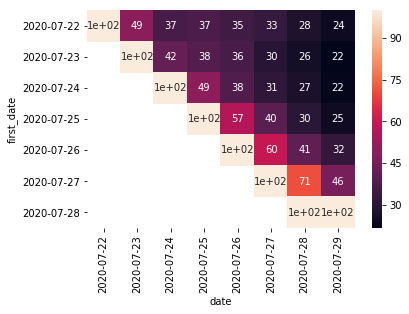

In [17]:
#percentage of users using app on day j if they have used app for first time on day i
sns.heatmap(df7, annot=True)